In [75]:
import sys
sys.path.insert(0,'/home/zahradnik/PycharmProjects/master_thesis')

In [76]:
import pandas as pd
import numpy as np
from src.modules import conf, fit, spec, evl, pred, preprocess, df_columns
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
%matplotlib inline
sns.set(style='ticks')
plt.rcParams['figure.figsize'] = [24, 8]
plt.rcParams['figure.dpi']

100.0

In [79]:
data = fit.load_pcls(
        conf["Athlete"]["name"],
        conf["Athlete"]["activity_type"],
        conf["Paths"]["pcl"],
    )

100%|██████████| 386/386 [00:00<00:00, 2471.78it/s]


In [80]:
race_index = fit.get_race_index(data, "2022-10-02-10-30") # HRADEC - 1:16 - 1:14
# race_index = fit.get_race_index(data, "2022-11-13-10-59") # VELKA KUNRATICKA 15:20 - 13:20
# race_index = fit.get_race_index(data, "2022-10-08-11-18") # BEROUNKA RUN 90:30 - 95:30
# race_index = fit.get_race_index(data, "2022-12-31-11-00") # SILVESTRAK 18:20 - 17:20
race_index

292

In [81]:
train_df = fit.clean_data(pd.concat(data[0:race_index]))[df_columns]
test_df = data[race_index]
speed_train = train_df.enhanced_speed
speed_valid = test_df.enhanced_speed
if len(train_df.columns) > len(test_df.columns):
    cols = list(test_df.columns)
else:
    cols = list(train_df.columns)
cols.pop(cols.index('enhanced_speed'))
train_df=train_df[cols]
test_df=test_df[cols]

In [82]:
import statsmodels.tsa.api as smt
def plot_multi_acf(data, lags, titles, ylim=None, partial=False):
    num_plots = len(lags)
    fig, ax = plt.subplots(len(lags), 1, figsize=(10, 3 * num_plots));
    if num_plots == 1:
        ax = [ax]
    acf_func = smt.graphics.plot_pacf if partial else smt.graphics.plot_acf
    for idx, (lag, title) in enumerate(zip(lags, titles)):
        fig = acf_func(data, lags=lag, ax=ax[idx], title=title);
        if ylim is not None:
            ax[idx].set_ylim(ylim);

    fig.tight_layout();

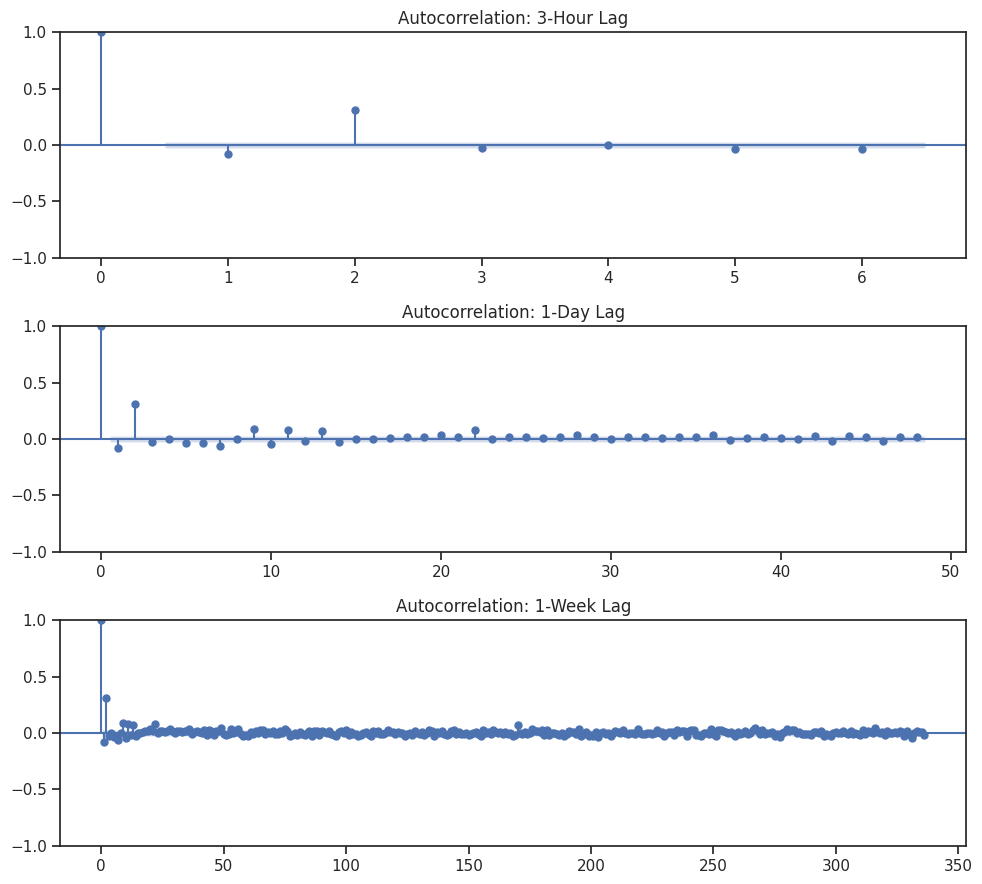

In [105]:
titles= ['Autocorrelation: 3-Hour Lag',
         'Autocorrelation: 1-Day Lag',
         'Autocorrelation: 1-Week Lag']
period_minutes = 30
samples_per_hour = int(60 / period_minutes)
samples_per_day = int(24 * samples_per_hour)
samples_per_week = int(7 * samples_per_day)

lags = [3 * samples_per_hour, samples_per_day, samples_per_week]

plot_multi_acf(test_df['slope_ascent'], lags, titles, partial=True)

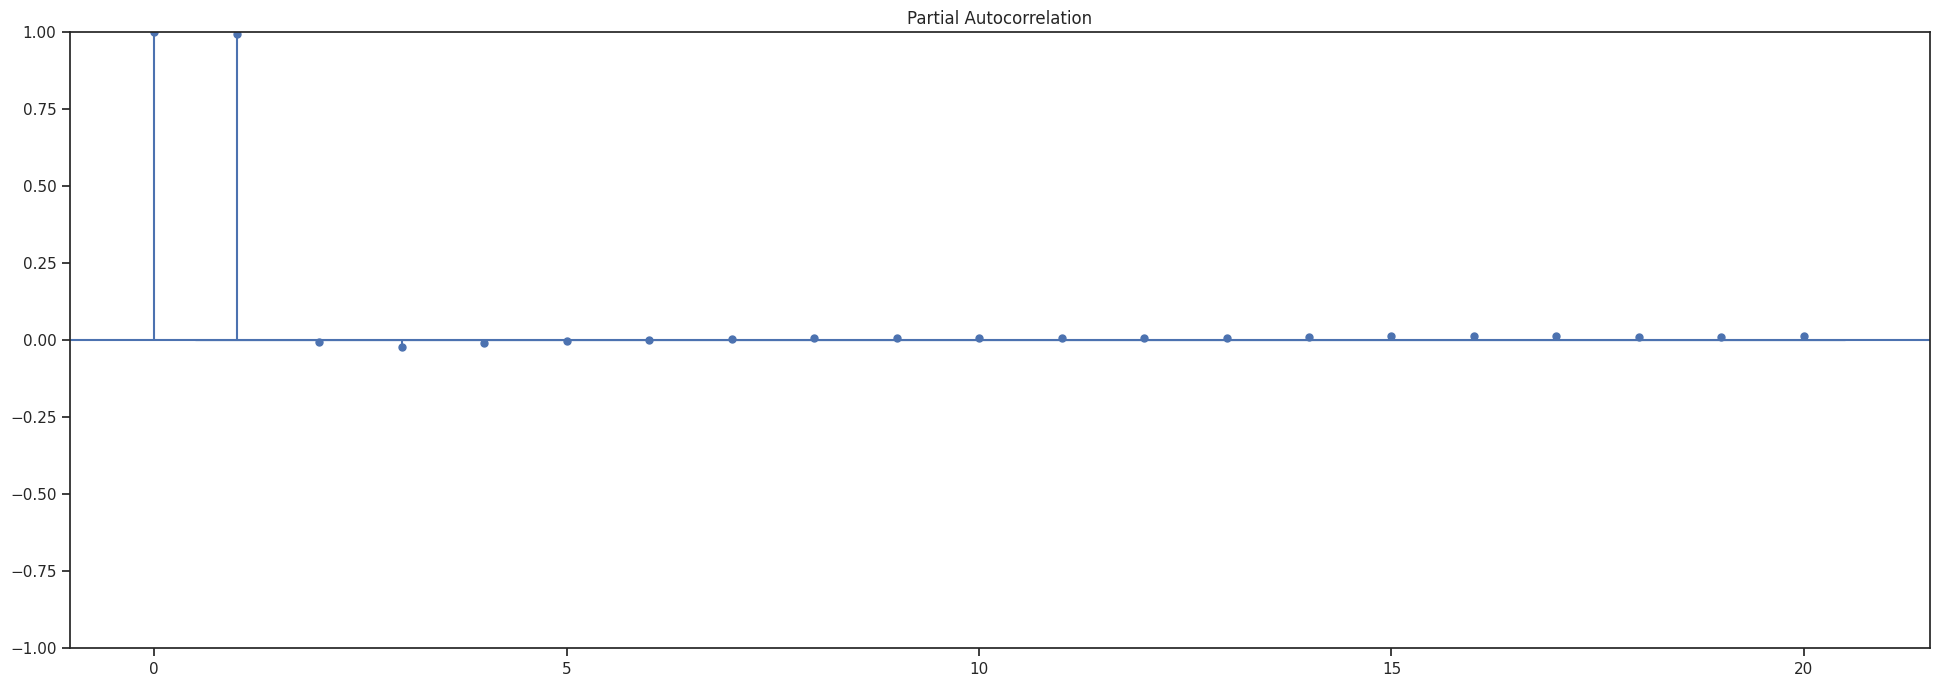

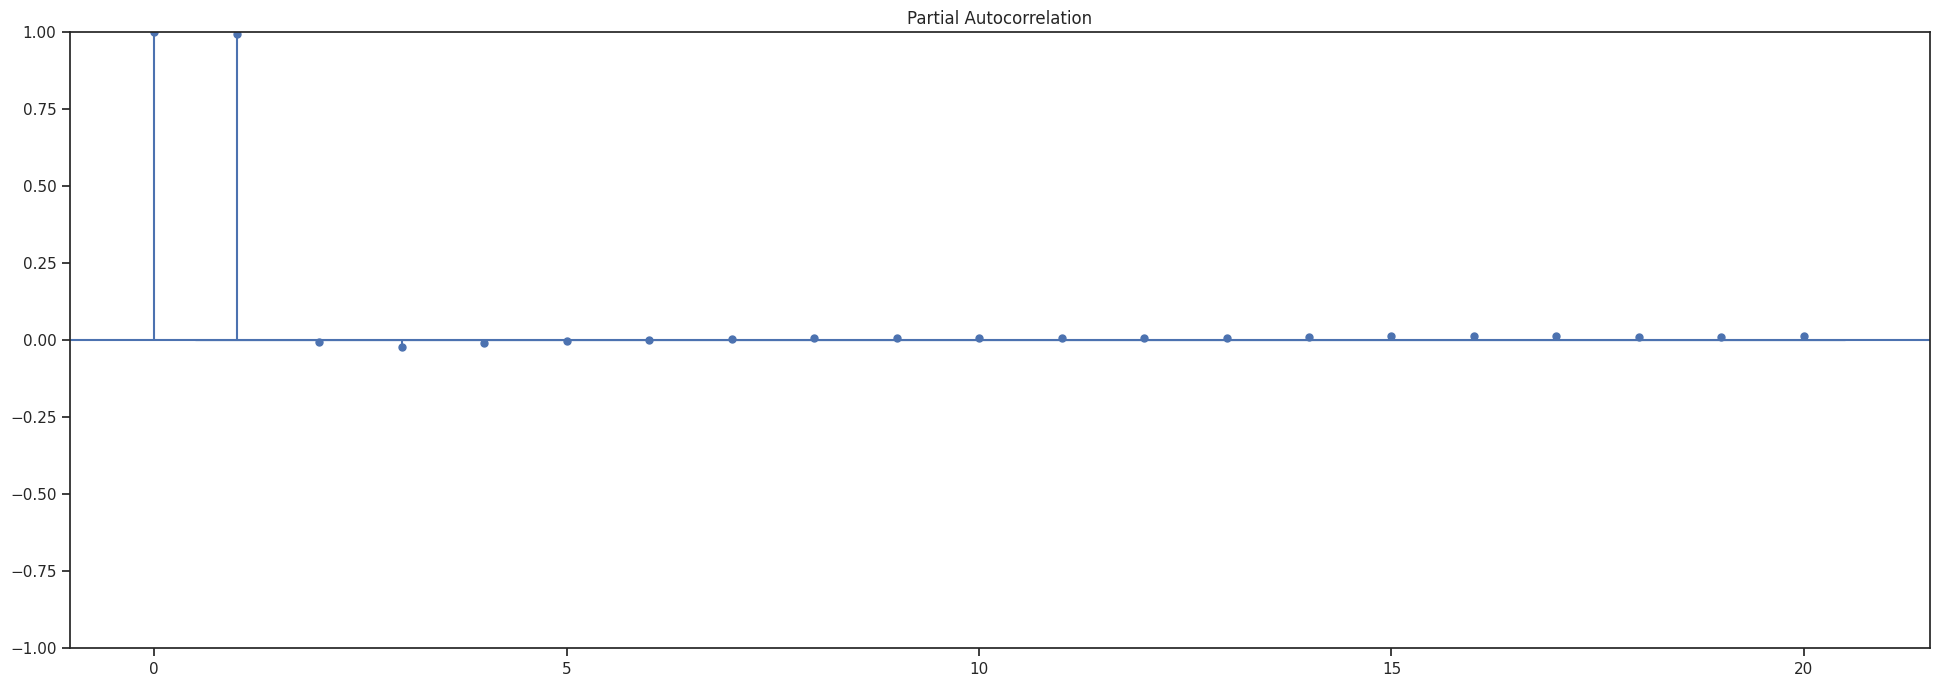

In [99]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(train_df['heart_rate'], lags=20)